In [1]:
#load necessary modules
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
mnist = input_data.read_data_sets("mnist_data/", one_hot=True)

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [3]:
#define hyper parameters
batch_size = 100
hidden_size = 128
learning_rate = 0.001
n_steps = 28
n_units = 28
n_class = 10

In [34]:
#define ploter
def plot_image(input_images, image_labels, image_pre_labels=None):
    assert len(input_images) == len(image_labels) == 9
    fig, axes = plt.subplots(3,3)
    for i, ax in enumerate(axes.flat):
        img = input_images[i]
        img = img.reshape((28,28))
        ax.imshow(img, cmap="binary")
        if image_pre_labels is not None:
            xlabel = "True:{0}, Predicted:{1}".format(image_labels[i], image_pre_labels[i])
        else:
            xlabel = "True:{0}".format(image_labels[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

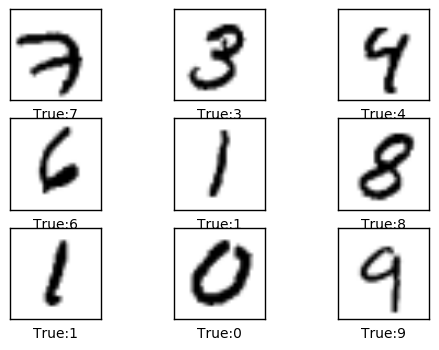

In [5]:
plot_image(mnist.train.images[:9],np.argmax(mnist.train.labels[:9],axis=1))

In [6]:
#define inputs
train_images = mnist.train.images
train_labels = mnist.train.labels
test_images = mnist.test.images
test_labels = mnist.test.labels

In [7]:
#define placeholser
x = tf.placeholder(name="inputs", dtype=tf.float32, shape=[None, 784])
y = tf.placeholder(name="labels", dtype=tf.float32, shape=[None, 10])
x_image = tf.reshape(x, [-1,n_units])
keep_prob = tf.placeholder(name="dropout_probility", dtype=tf.float32)

In [8]:
#define model structure
#from image to hidden 28 -> 128
weight_input = tf.get_variable(name="input_weights", dtype=tf.float32, \
                               shape=[n_units, hidden_size], \
                               initializer=tf.truncated_normal_initializer(mean=0, stddev=0.5)
                              )
bias_input = tf.get_variable(name="input_bias", dtype=tf.float32, \
                            shape=[hidden_size], \
                            initializer=tf.constant_initializer(0.1)
                            )

#from hidden to classes 128 -> 10
weight_output = tf.get_variable(name="output_weights", dtype=tf.float32, \
                               shape=[hidden_size, n_class], \
                               initializer=tf.truncated_normal_initializer(mean=0, stddev=0.5)
                               )
bias_output = tf.get_variable(name="output_bias", dtype=tf.float32, \
                            shape=[n_class], \
                            initializer=tf.constant_initializer(0.1)
                             )

In [10]:
#in
x_in = tf.matmul(x_image, weight_input) + bias_input
x_in = tf.reshape(x_in, [-1, n_steps, hidden_size])
#rnn 
rnn_cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, forget_bias=1.0, state_is_tuple=True)
init_state = rnn_cell.zero_state(batch_size, dtype=tf.float32)
c_state, h_state = tf.nn.dynamic_rnn(rnn_cell, x_in, initial_state=init_state, time_major=False)
#out
x_out = tf.matmul(h_state[1], weight_output) + bias_output

In [11]:
#define loss
cross_entropy_loss = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=x_out)

In [12]:
#choose optimizer
optimize = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy_loss)

In [15]:
#define accuracy
eqs = tf.equal(tf.argmax(y,axis=1), tf.argmax(x_out, axis=1))
acc = tf.reduce_mean(tf.cast(eqs, tf.float32))

In [17]:
#start a Session and train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        x_batch, y_batch = mnist.train.next_batch(batch_size)
        sess.run(optimize, feed_dict={x:x_batch, y:y_batch})
        if i % 100 == 0:
            print("accuracy on train_set if : {:.2%}".format(sess.run(acc, feed_dict={x:x_batch, y:y_batch})))
        

accuracy on train_set if : 18.00%
accuracy on train_set if : 89.00%
accuracy on train_set if : 96.00%
accuracy on train_set if : 100.00%
accuracy on train_set if : 93.00%
accuracy on train_set if : 95.00%
accuracy on train_set if : 98.00%
accuracy on train_set if : 99.00%
accuracy on train_set if : 99.00%
accuracy on train_set if : 98.00%


In [20]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(1000):
    x_batch, y_batch = mnist.train.next_batch(batch_size)
    sess.run(optimize, feed_dict={x:x_batch, y:y_batch})
    if i % 100 == 0:
        print("accuracy on train_set if : {:.2%}".format(sess.run(acc, feed_dict={x:x_batch, y:y_batch})))

accuracy on train_set if : 34.00%
accuracy on train_set if : 91.00%
accuracy on train_set if : 96.00%
accuracy on train_set if : 97.00%
accuracy on train_set if : 96.00%
accuracy on train_set if : 95.00%
accuracy on train_set if : 99.00%
accuracy on train_set if : 99.00%
accuracy on train_set if : 98.00%
accuracy on train_set if : 98.00%


In [23]:
sess.run(acc, feed_dict={x:test_images[:100], y:test_labels[:100]})

0.98000002

In [25]:
test_out = sess.run(x_out, feed_dict={x:test_images[:100], y:test_labels[:100]})
print(np.argmax(test_labels[:100], axis=1))
print(np.argmax(test_out, axis=1))

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 2 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


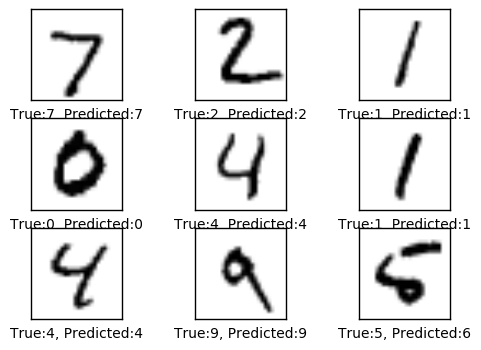

In [36]:
plot_image(test_images[:9], np.argmax(test_labels,axis=1)[:9], np.argmax(test_out, axis=1)[:9])